In [75]:
import numpy as np
import torch_geometric as pyg
import HGScore.model as md
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt

from HGScore.data import CASFDataset
import numpy as np
import HGScore.model as md

In [76]:
# model_path = "../models/model.ckpt"
# model = md.Model.load_from_checkpoint(model_path)

In [77]:
# data_path = '../data'
# atomic_distance_cutoff = 4.0
# batch_size = 64

# dataset = CASFDataset(root=data_path,
#                         year='16',
#                         atomic_distance_cutoff=atomic_distance_cutoff,
#                         only_pocket=True)


In [78]:
# for i in range(285):
#     g = dataset[i]
#     print('data,{}'.format(i))
#     # print(g.x_dict['protein_atoms'].shape[0], 'atoms in protein')
#     # print(g.x_dict['ligand_atoms'].shape[0], 'atoms in ligand')
#     batch = pyg.data.Batch.from_data_list([g])
#     score = model.predict(batch)
#     # break

In [79]:
dict_conv_toP = {'conv_0': [], 'conv_1': [], 'conv_2': []}
dict_conv_toL = {'conv_0': [], 'conv_1': [], 'conv_2': []}

with open("aggr_ratio.txt", 'r') as f:
    lines = f.readlines()
    for line in lines:
        line = line.replace('\n', '')
        if line.startswith('conv'):
            conv_id = 'conv_{}'.format(line.split(',')[1])
        
        if line.startswith('L/P = L'):
            ratio = float(line.split(',')[1])
            dict_conv_toL[conv_id] += [ratio]
        elif line.startswith('P/L = P'):
            ratio = float(line.split(',')[1])
            dict_conv_toP[conv_id] += [ratio]

dict_conv_toP['conv_0'] = np.array(dict_conv_toP['conv_0'])
dict_conv_toP['conv_1'] = np.array(dict_conv_toP['conv_1'])
dict_conv_toP['conv_2'] = np.array(dict_conv_toP['conv_2'])
dict_conv_toL['conv_0'] = np.array(dict_conv_toL['conv_0'])
dict_conv_toL['conv_1'] = np.array(dict_conv_toL['conv_1'])
dict_conv_toL['conv_2'] = np.array(dict_conv_toL['conv_2'])

list_P = [['conv_0', np.abs(dict_conv_toP['conv_0'].mean())-1],
['conv_1', np.abs(dict_conv_toP['conv_1'].mean())-1],
['conv_2', np.abs(dict_conv_toP['conv_2'].mean())-1]]

list_L = [['conv_0', np.abs(dict_conv_toL['conv_0'].mean())-1],
['conv_1', np.abs(dict_conv_toL['conv_1'].mean())-1],
['conv_2', np.abs(dict_conv_toL['conv_2'].mean())-1]]


    layer  ratio P/L
0  conv_0   0.711111
1  conv_1  -0.045686
2  conv_2   0.456126


Text(0.5, 1.0, 'Importance of the molecules for the protein')

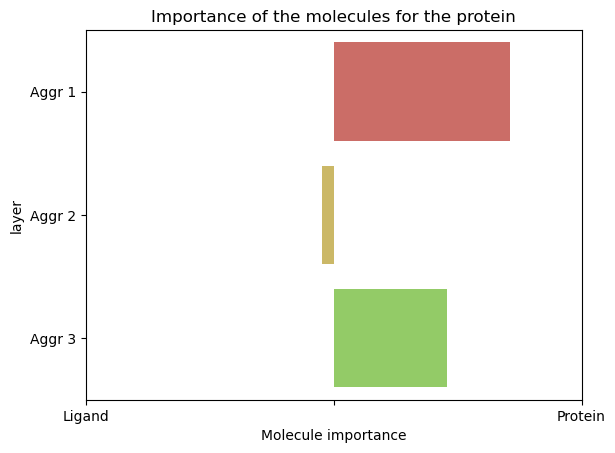

In [80]:
df_P = pd.DataFrame(list_P, columns=['layer', 'ratio P/L'])
print(df_P)
ax = sns.barplot(data=df_P, x="ratio P/L", y="layer", palette=sns.color_palette("hls", 8))
ax.set_xticks([-1, 0, 1], labels=['Ligand', '', 'Protein'])
ax.set_xlabel('Molecule importance')
ax.set_yticklabels(['Aggr 1', 'Aggr 2', 'Aggr 3'])
ax.set_title('Importance of the molecules for the protein')

    layer  ratio L/P
0  conv_0   0.805162
1  conv_1  -0.951893
2  conv_2  -0.721128


Text(0.5, 1.0, 'Importance of the molecules for the ligand')

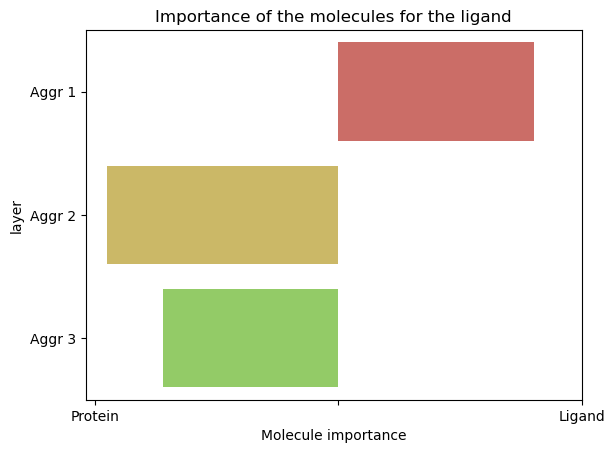

In [81]:
df_L = pd.DataFrame(list_L, columns=['layer', 'ratio L/P'])
print(df_L)
ax = sns.barplot(data=df_L, x="ratio L/P", y="layer", palette=sns.color_palette("hls", 8))
ax.set_xticks([-1, 0, 1], labels=['Protein', '', 'Ligand'])
ax.set_xlabel('Molecule importance')
ax.set_yticklabels(['Aggr 1', 'Aggr 2', 'Aggr 3'])
ax.set_title('Importance of the molecules for the ligand')